## 3. Data Preperation

### Agenda

[ ] noch offen company_size 10/49, 100-500 und 500-999 falsch beschrieben

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling  
import missingno as msno

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Zielverzeichnis (bitte anpassen)
TARGET_DIR = r"/Users/danielmini/Projekte/data_analyics26/data_analytics_master/2_data_acquisition/raw_data"


# CSV-Datei finden und laden
csv_files = [f for f in os.listdir(TARGET_DIR) if f.endswith(".csv")]
df = pd.read_csv(os.path.join(TARGET_DIR, csv_files[1]))

print("DataFrame geladen:", df.shape)

DataFrame geladen: (19158, 14)


In [3]:
# Generate a profile report with ydata_profiling
profile = ydata_profiling.ProfileReport(df, title="Data Profile Report")
# Save the report as an HTML file
profile.to_file("data_profile_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 826.46it/s]


## Fahrplan v0.1 beta

1) Erster Überblick / Metadaten und Verständnis
- Größe des Datensatzes
- Anzahl variablen
- Eigenschaften, Typen der Variablen
- Dimension
- Beispieldaten

2) Datenqualität: Missing Values, Duplikate, offensichtliche Probleme
- Missingness: Unterscheiden und analysieren ob Missing at random oder nicht
- Duplikate: echtes Duplikat 100% identisch keine Abhängigkeit von unbeobachteten Werten feststellbar --> Lösung: löschen
  - kein echtes Duplikat es fehlt eine variable die den Konflikt der Daten auflösen kann und klarheit über das Duplikat und Ursache liefert
  - Analyse der Ursachen und versuch der Lösung, letzte Möglichkeit entweder ignorieren / löschen gerade wenn der %-Anteil klein (<1%) aber Gesamtzusammenhang beachten
- offensichtliche Probleme: Ausreißer, fehlerhafte Daten, Messfehler sein

3) Datentypen bereinigen (sehr häufig nötig), bzw. Probleme der Daten lösen und anpassen ---> abhängig vom Ziel und der Problemstellung


## 3.1) Überblick: Ziel: Größe, Spalten, Datentypen, erste Werte.

In [4]:
df.shape

(19158, 14)

In [5]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
df.tail(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [7]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## 3.2) Datenqualität: Missingness, Duplikate und weiteres

In [8]:
# Missing values
missing_abs = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

print("Missing Values (Absolute):\n", missing_abs[missing_abs > 0])
print("\nMissing Values (Percentage):\n", missing_pct[missing_pct > 0])


Missing Values (Absolute):
 company_type           6140
company_size           5938
gender                 4508
major_discipline       2813
education_level         460
last_new_job            423
enrolled_university     386
experience               65
dtype: int64

Missing Values (Percentage):
 company_type           32.049274
company_size           30.994885
gender                 23.530640
major_discipline       14.683161
education_level         2.401086
last_new_job            2.207955
enrolled_university     2.014824
experience              0.339284
dtype: float64


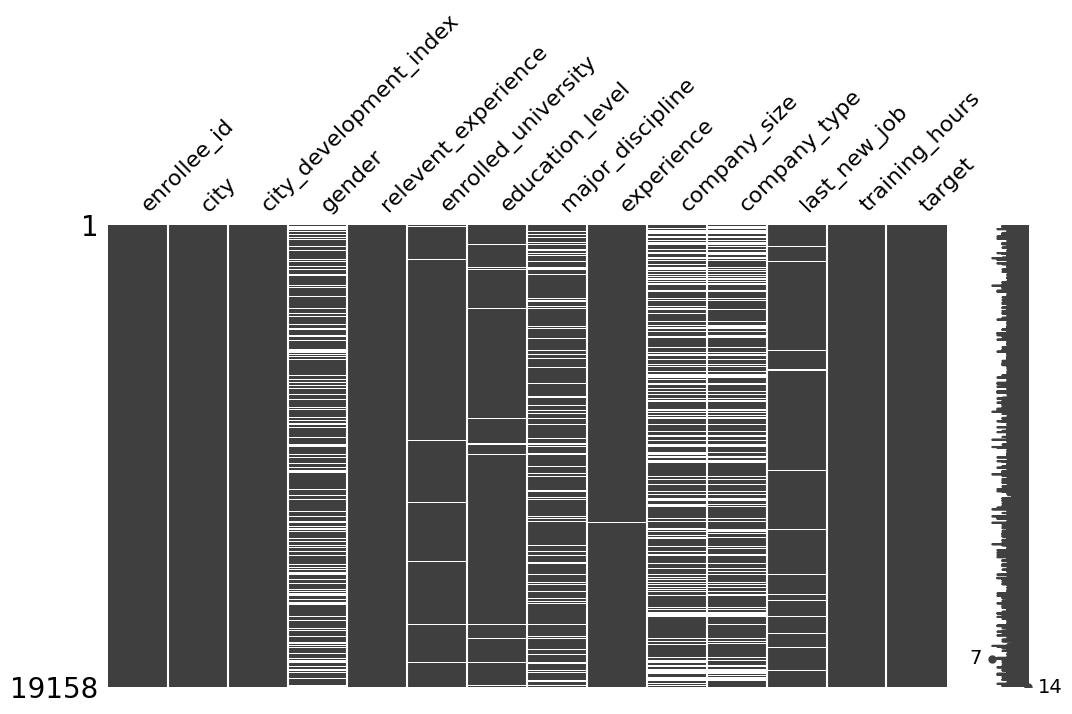

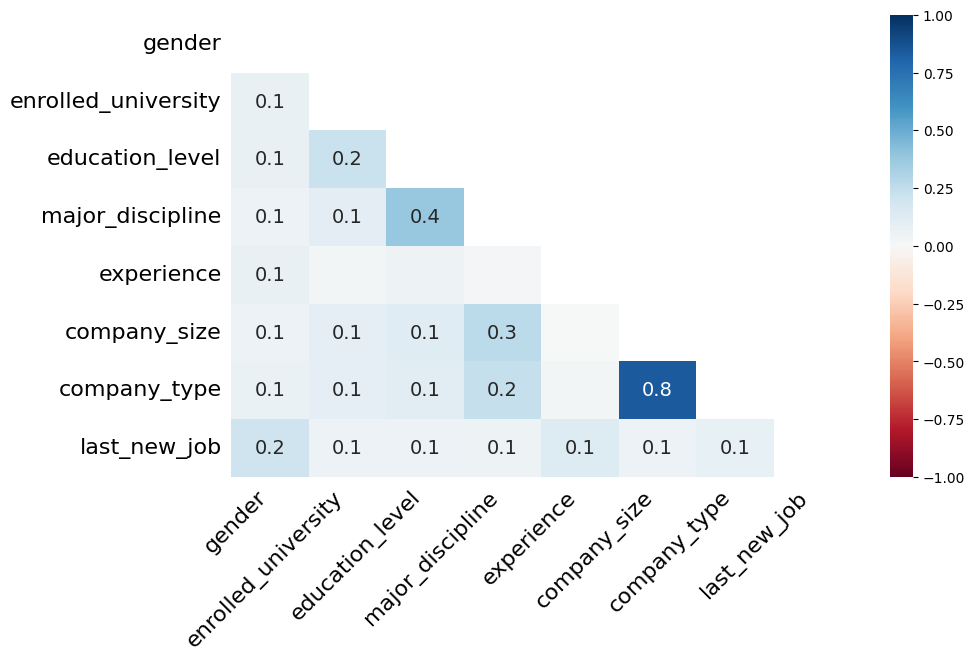

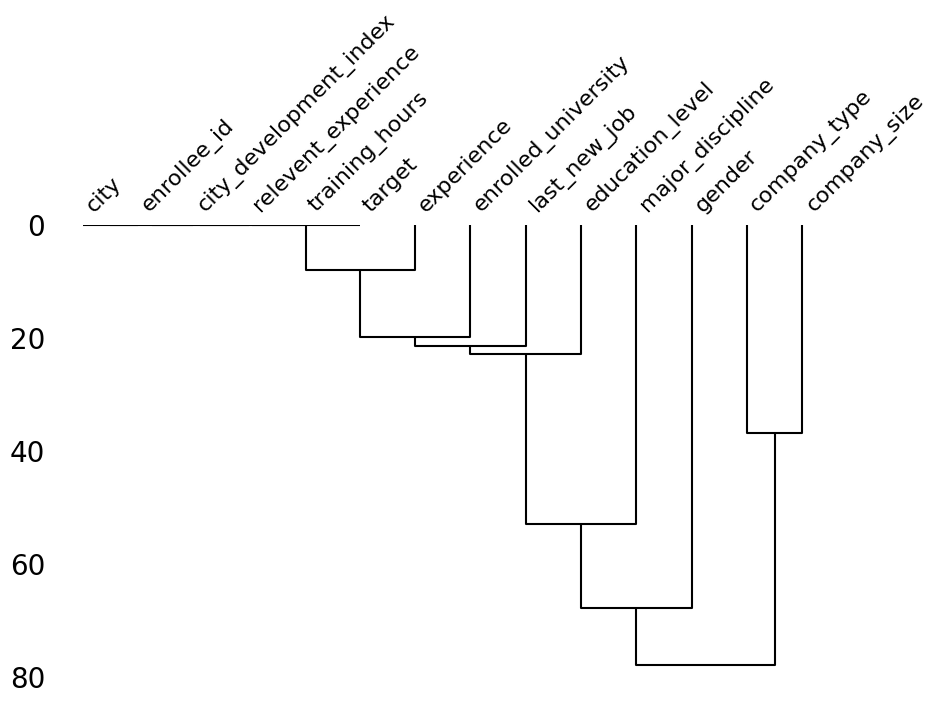

In [9]:
msno.matrix(df, figsize=(12,6))
plt.show()

msno.heatmap(df, figsize=(10,6))
plt.show()

# zeigt Kombinationsmuster (ähnlich UpSet)
msno.dendrogram(df, figsize=(10,6))
plt.show()

## Analyse Missingness

Missing Completely At Random: Völlig zufällig fehlend: Fehlende Werte hängen von nichts im Datensatz ab.
Prüfen: Vergleiche beobachtete Variablen zwischen Fällen „fehlt“ vs. „vorhanden“. Wenn es klare Unterschiede gibt, ist das eher unwahrscheinlich.

Missing At Random: Zufällig fehlend gegeben beobachtete Daten: Fehlende Werte hängen von Variablen ab, die du gemessen hast.
Prüfen: Baue pro Zielspalte einen Indikator „fehlt/ist da“ und teste bzw. modelliere ihn mit beobachteten Variablen. Gute Vorhersagbarkeit spricht dafür.

Missing Not At Random: Nicht zufällig fehlend: Fehlende Werte hängen vom fehlenden Wert selbst oder einer nicht gemessenen Ursache ab.
Prüfen: Aus Daten allein kaum sicher; du brauchst Prozesswissen oder Sensitivitätsanalysen.

Missing Values (Percentage):
- company_type           32.049274
- company_size           30.994885
- gender                 23.530640
- major_discipline       14.683161
- education_level         2.401086
- last_new_job            2.207955
- enrolled_university     2.014824
- experience              0.339284

Hier kann gerade bei komplexeren Problemen die Analyse durch eine logistische Regression vertieft werden

Text(0.5, 1.0, 'Company Type Distribution')

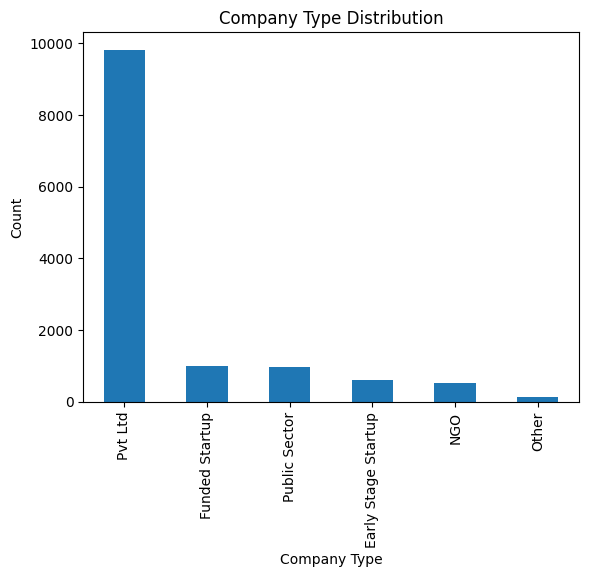

In [10]:
counts = df['company_type'].value_counts()
counts.plot(kind='bar') 
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.title('Company Type Distribution')   

In [11]:
# Create a new dataframe with all missing values removed
df_clean = df.dropna()

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_clean.shape)
print("Rows removed:", df.shape[0] - df_clean.shape[0])

Original DataFrame shape: (19158, 14)
Cleaned DataFrame shape: (8955, 14)
Rows removed: 10203


Wir können diese Daten nicht einfach fallen lassen, da dies zu einem Verlust von mehr als 50% der Daten führt.

## Lösung der Missingness Probleme 

1. Möglichkeit Imputation / also einfügen eines Wertes 
    A einfacher Ansatz
    - Modus, wenn nominal
    - Median, wenn metrisch, ordinal
    B Mehrdimensional 
    C Modell wählen
    ---> Verteilung wird davon beeinflusst

2. Möglichkeit
    Wenn Daten nicht MAR ->
    Hier benötige ich Prozesswissen um zu verstehen, warum diese Daten nicht einfach fehlen

Folgerung:

Wenn die Variablen zu viele fehlende Werte haben und MAR, oder MCAR, dann kann man entscheiden, diese Variablen nicht weiter zu berücksichtigen. (also >50%, als Daumenregel)

### Hypothese für diesen Datensatz: MNAR -> die Klassen wurden an der Stelle einfach nicht beantwortet
Folglich werden wir neue Klassen erzeugen, damit die fehlednen Werte ersetzt werden

In [12]:

# Duplikate
df.duplicated().sum()

np.int64(0)

## offensichtliche Probleme

In [13]:
# last new job und experience
# beide sind kategorische Variablen, daher zählen wir die Werte, aber beide sind auch ordinal skaliert
# es bietet sich ein recoding an, um die Reihenfolge der Kategorien zu berücksichtigen
df['last_new_job'].value_counts()   


last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [14]:
df['experience'].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

## 3.3) Datentypen Probleme

In [15]:
df['relevent_experience'].value_counts() 
## diese Variable können wir in eine binäre Variable überführen, da sie nur zwei Kategorien enthält (Relevant Experience, No Relevant Experience)


relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

## 3.4) beheben aller Datenprobleme

In [16]:
# Behebe fehlende Werte durch Einfügen einer neuen Kategorie "No Answer"
df_imputed = df.copy()

# Spalten mit fehlenden Werten (kategorisch)
categorical_cols_with_missing = ['gender', 'enrolled_university', 'education_level', 
                                   'major_discipline', 'company_size', 'company_type']

# Ersetze NaN-Werte mit "No Answer" für kategorische Variablen
for col in categorical_cols_with_missing:
    df_imputed[col] = df_imputed[col].fillna('No Answer')

# Überprüfe das Ergebnis
print("Fehlende Werte nach Imputation:")
print(df_imputed[categorical_cols_with_missing].isna().sum())
print("\nForm des Datensatzes:", df_imputed.shape)
print("\nBeispiel der neuen 'No Answer' Kategorie in 'gender':")
print(df_imputed['gender'].value_counts())


Fehlende Werte nach Imputation:
gender                 0
enrolled_university    0
education_level        0
major_discipline       0
company_size           0
company_type           0
dtype: int64

Form des Datensatzes: (19158, 14)

Beispiel der neuen 'No Answer' Kategorie in 'gender':
gender
Male         13221
No Answer     4508
Female        1238
Other          191
Name: count, dtype: int64


In [17]:
# Ordinale Kodierung für experience und last_new_job mit plausiblen Annahmen
# Annahmen:
# - "<1" -> 0 Jahre, ">20" -> 21 Jahre
# - "never" -> 0 Jahre, ">4" -> 5 Jahre

experience_map = {
    "<1": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9,
    "10": 10, "11": 11, "12": 12, "13": 13, "14": 14, "15": 15, "16": 16, "17": 17,
    "18": 18, "19": 19, "20": 20, ">20": 21
}

last_new_job_map = {
    "never": 0, "1": 1, "2": 2, "3": 3, "4": 4, ">4": 5
}

df_imputed["experience_ord"] = df_imputed["experience"].map(experience_map)
df_imputed["last_new_job_ord"] = df_imputed["last_new_job"].map(last_new_job_map)

# Median vor der Imputation berechnen und anzeigen
experience_median = df_imputed["experience_ord"].median()
last_new_job_median = df_imputed["last_new_job_ord"].median()

print("Median experience_ord (vor Imputation):", experience_median)
print("Median last_new_job_ord (vor Imputation):", last_new_job_median)

Median experience_ord (vor Imputation): 9.0
Median last_new_job_ord (vor Imputation): 1.0


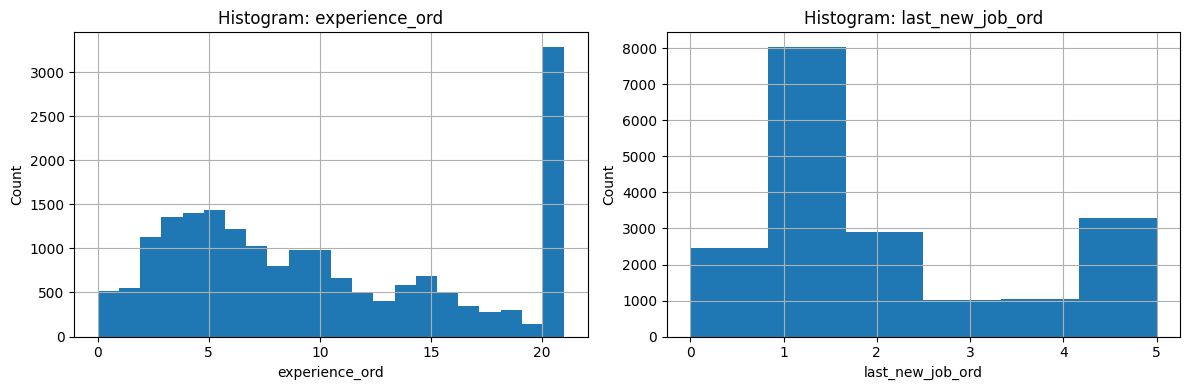

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_imputed["experience_ord"].hist(ax=axes[0], bins=22)
axes[0].set_title("Histogram: experience_ord")
axes[0].set_xlabel("experience_ord")
axes[0].set_ylabel("Count")

df_imputed["last_new_job_ord"].hist(ax=axes[1], bins=6)
axes[1].set_title("Histogram: last_new_job_ord")
axes[1].set_xlabel("last_new_job_ord")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Modus nicht die richtige wahl, da wir Kategorien haben die wir ordnen können
der Modus würde jedoch die häufigste Klasse wählen

In [19]:
# Median-Imputation für die ordinalen Variablen
df_imputed["experience_ord"] = df_imputed["experience_ord"].fillna(experience_median)
df_imputed["last_new_job_ord"] = df_imputed["last_new_job_ord"].fillna(last_new_job_median)

print(df_imputed[["experience", "experience_ord", "last_new_job", "last_new_job_ord"]].head())

  experience  experience_ord last_new_job  last_new_job_ord
0        >20            21.0            1               1.0
1         15            15.0           >4               5.0
2          5             5.0        never               0.0
3         <1             0.0        never               0.0
4        >20            21.0            4               4.0


In [21]:
# Recode relevent_experience to binary (0 and 1)
df_imputed['relevent_experience'] = (df_imputed['relevent_experience'] == 'Has relevent experience').astype(int)

print("Recoded relevent_experience:")
print(df_imputed['relevent_experience'].value_counts())


Recoded relevent_experience:
relevent_experience
1    13792
0     5366
Name: count, dtype: int64


In [22]:
# Entferne die transformierten Originalspalten und erstelle einen neuen Cleaned-Datensatz
df_cleaned = df_imputed.drop(columns=["experience", "last_new_job"])

print("Neuer Cleaned-Datensatz:", df_cleaned.shape)
display(df_cleaned.head())

df_cleaned.info()

Neuer Cleaned-Datensatz: (19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,training_hours,target,experience_ord,last_new_job_ord
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,No Answer,No Answer,36,1.0,21.0,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,47,0.0,15.0,5.0
2,11561,city_21,0.624,No Answer,0,Full time course,Graduate,STEM,No Answer,No Answer,83,0.0,5.0,0.0
3,33241,city_115,0.789,No Answer,0,No Answer,Graduate,Business Degree,No Answer,Pvt Ltd,52,1.0,0.0,0.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,50-99,Funded Startup,8,0.0,21.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
 12  experience_ord          19158 non-null  float64
 13  last_new_job_ord        19158 non-null  float64
dtypes: float64(4), int64(3), object(7)
mem

In [23]:
TARGET_OUTPUT_DIR = r"/Users/danielmini/Projekte/data_analyics26/data_analytics_master/2_data_acquisition/processed_data"

output_path = os.path.join(TARGET_OUTPUT_DIR, "cleaned_data.csv")
df_cleaned.to_csv(output_path, index=False)
print(f"Gespeichert: {output_path}")

Gespeichert: /Users/danielmini/Projekte/data_analyics26/data_analytics_master/2_data_acquisition/processed_data/cleaned_data.csv
